In [ ]:
1: Fake news
0: Real news 

In [75]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yigit_5rkz30x\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Pre-processing

In [11]:
news_dataset = pd.read_csv('train.csv')

In [12]:
news_dataset.shape

(20800, 5)

In [13]:
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [14]:
#counting the number of missing values in the dataset
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [15]:
#replacing the null value with empty string
news_dataset = news_dataset.fillna('')

In [16]:
#merging the  author name and news title
news_dataset['content'] = news_dataset['author'] + ' ' + news_dataset['title']

In [17]:
news_dataset['content']

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object

In [20]:
#separating the data & label
X = news_dataset.drop(columns='label', axis=1)
y = news_dataset['label']

In [24]:
print(X)
print(y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [28]:
port_stem = PorterStemmer()

In [29]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-z]',' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [30]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [31]:
print(news_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [34]:
#separating the data and label
X = news_dataset['content'].values 
y = news_dataset['label'].values

In [35]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [36]:
print(y)

[1 0 1 ... 0 1 1]


In [37]:
y.shape

(20800,)

In [46]:
#converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [47]:
print(X)

  (0, 15697)	0.28485063562728646
  (0, 13480)	0.2565896679337957
  (0, 8915)	0.3635963806326075
  (0, 8636)	0.29212514087043684
  (0, 7698)	0.24785219520671603
  (0, 7012)	0.21874169089359144
  (0, 4979)	0.233316966909351
  (0, 3795)	0.2705332480845492
  (0, 3603)	0.3598939188262559
  (0, 2962)	0.2468450128533713
  (0, 2485)	0.3676519686797209
  (0, 268)	0.27010124977708766
  (1, 16812)	0.30071745655510157
  (1, 6823)	0.1904660198296849
  (1, 5510)	0.7143299355715573
  (1, 3571)	0.26373768806048464
  (1, 2816)	0.19094574062359204
  (1, 2224)	0.3827320386859759
  (1, 1895)	0.15521974226349364
  (1, 1498)	0.2939891562094648
  (2, 15622)	0.41544962664721613
  (2, 9625)	0.49351492943649944
  (2, 5975)	0.3474613386728292
  (2, 5396)	0.3866530551182615
  (2, 3106)	0.46097489583229645
  :	:
  (20797, 13128)	0.2482526352197606
  (20797, 12350)	0.27263457663336677
  (20797, 12144)	0.24778257724396507
  (20797, 10311)	0.08038079000566466
  (20797, 9593)	0.174553480255222
  (20797, 9523)	0.295420

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [56]:
model = LogisticRegression()

In [57]:
model.fit(X_train, y_train)

LogisticRegression()

Evaluation
Accuracy score

In [60]:
#accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [61]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9864783653846154


In [62]:
#accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [63]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9790865384615385


Making a Predictive System

In [71]:
X_new = X_test[1]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
    print('The news is Real')
else:
     print('The new is Fake')

[0]
The news is Real


In [76]:
print(y_test[3])

0


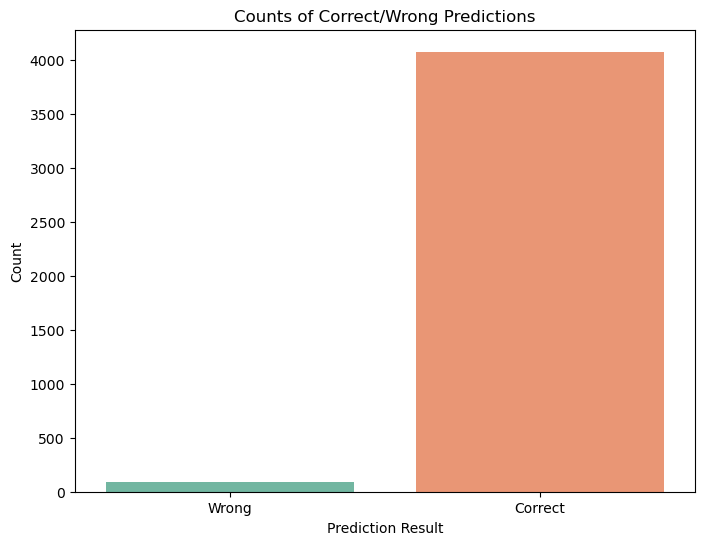

In [82]:
# Bar plot showing distribution of correct and incorrect predictions
plt.figure(figsize=(8, 6))
sns.countplot(x=(X_test_prediction == y_test), palette="Set2")
plt.title("Counts of Correct/Wrong Predictions")
plt.xticks([0, 1], ['Wrong', 'Correct'])
plt.xlabel("Prediction Result")
plt.ylabel("Count")
plt.show()

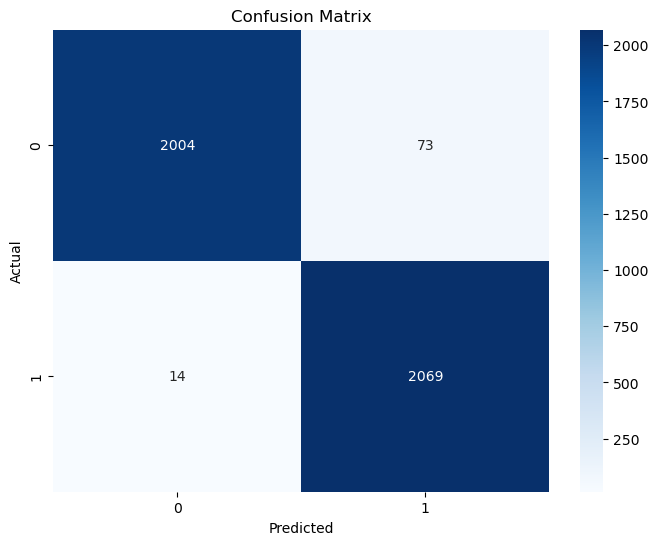

In [83]:
# Confusion matrix visualization
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, X_test_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

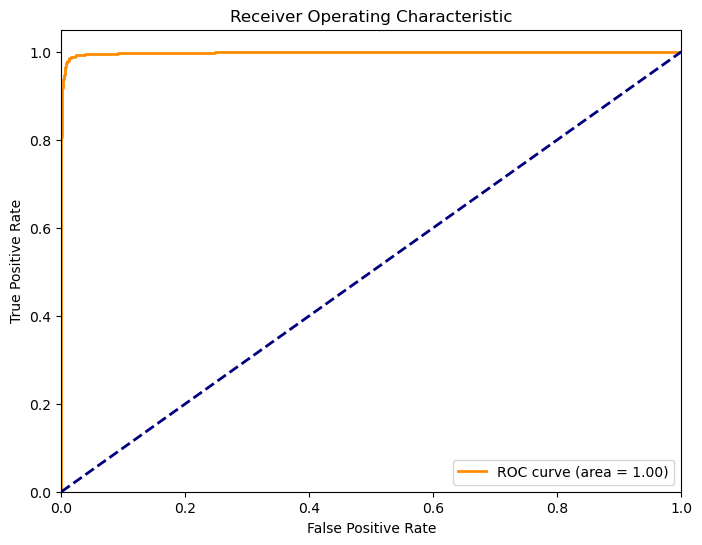

In [81]:
# Örnek bir ROC eğrisi
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()